# Feature Analysis
## Missing Values their Imputations and Correlation of features

### Importing Libraries

In [21]:
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import visuals as vs
import seaborn as sb
import warnings
warnings.filterwarnings("ignore", category = UserWarning)

# Importing visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Loading Dataset
The cell below will Load all the data from the dataset

In [22]:
# Load the Covid-19 dataset
data = pd.read_csv('owid-covid-data.csv')

# Splitting features and label
cases = data['new_cases']
features = data.drop('new_cases', axis = 1)

# Success - Displaying the records
display(features)

# Success
print("Covd-19 dataset has {} data points.".format(data.shape[0]))

,iso_code,continent,location,date,total_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26129,NaN,NaN,International,2020-02-28,705.0,4.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26130,NaN,NaN,International,2020-02-29,705.0,6.0,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26131,NaN,NaN,International,2020-03-01,705.0,6.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26132,NaN,NaN,International,2020-03-02,705.0,6.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Covd-19 dataset has 26134 data points.


## Missing Entries
In the cell below we will be calculating the missing entries from the dataset. For finding the missing entries in the dataset `'isnull()'` function is used. No parameter is required in this function. This function will return the number of misisng entries.
For calculating the precentage of missing entries we are using the expression `sum()*100/len(features)`, this will calulate the precentage of missing entries for each column given in the dataset.

In [23]:
missing_percentage = features.isnull().sum()*100/len(features)

print("Missing values in percentage: \n\n")
print(missing_percentage)

Missing values in percentage: 


iso_code                            0.244892
continent                           0.925997
location                            0.000000
date                                0.000000
total_cases                         0.880080
total_deaths                        0.880080
new_deaths                          0.880080
total_cases_per_million             1.124971
new_cases_per_million               1.124971
total_deaths_per_million            1.124971
new_deaths_per_million              1.124971
total_tests                        71.952246
new_tests                          74.504477
total_tests_per_thousand           71.952246
new_tests_per_thousand             74.504477
new_tests_smoothed                 69.767353
new_tests_smoothed_per_thousand    69.767353
tests_units                        67.379659
stringency_index                   20.054335
population                          0.244892
population_density                  4.331522
median_age            

Now in the cell below we will be selecting only those features which have `less than 30%` missing values.
we will do that by dropping those columns which have greater than 30% missing values.

In [24]:
selected_features = features.drop(["handwashing_facilities","extreme_poverty", "total_tests","new_tests","total_tests_per_thousand", "new_tests_smoothed","new_tests_smoothed_per_thousand","tests_units", "new_tests_per_thousand"], axis=1)

# Success - Displaying the records
display(selected_features)

,iso_code,continent,location,date,total_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,median_age,aged_65_older,aged_70_older,gdp_per_capita,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,...,18.6,2.581,1.337,1803.987,597.029,9.59,NaN,NaN,0.5,64.83
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,...,18.6,2.581,1.337,1803.987,597.029,9.59,NaN,NaN,0.5,64.83
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,...,18.6,2.581,1.337,1803.987,597.029,9.59,NaN,NaN,0.5,64.83
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,...,18.6,2.581,1.337,1803.987,597.029,9.59,NaN,NaN,0.5,64.83
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,...,18.6,2.581,1.337,1803.987,597.029,9.59,NaN,NaN,0.5,64.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26129,NaN,NaN,International,2020-02-28,705.0,4.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26130,NaN,NaN,International,2020-02-29,705.0,6.0,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26131,NaN,NaN,International,2020-03-01,705.0,6.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26132,NaN,NaN,International,2020-03-02,705.0,6.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


--------------------------------------------------------
## Imputation Techniques
In the cell above we got the features which have less than 30% missing entries. Now we will be applying different imputation techniques to overcome the problem of missing entries.

## Technique No 1
### Filling with constant or 0 value
In this technique we will be filing the missing entries by `constant values`. For example we will fill up the numerical columns with `0 value`. For `non-numerical columns` which are also known as `categorical data` we will assign a constant string to that for example: we had fill up the non-numerical columns with `Null`, and all the missing entries will be considered as of `Null category`, you can add any name or category by your choice.For using this technique we will be usng pandas functions. `fillna()` function is used to fill up the missing entries, the first argument will be a value by which we are replacing the missing entry. In `fillna()` we had given a second argument which is `inplace=True` this tells the function to filup and save the data in the same variable so we don't need the return values.

In [25]:
# Techniques for imputation process
# Filling with 0 or constant values for categorical data

constant_imputation_features = selected_features

constant_imputation_features["iso_code"].fillna("Null", inplace=True)
constant_imputation_features["continent"].fillna("Null", inplace=True)
constant_imputation_features["total_cases"].fillna(0, inplace=True)
constant_imputation_features["total_deaths"].fillna(0, inplace=True)
constant_imputation_features["new_deaths"].fillna(0, inplace=True)
constant_imputation_features["total_cases_per_million"].fillna(0, inplace=True)
constant_imputation_features["new_cases_per_million"].fillna(0, inplace=True)
constant_imputation_features["total_deaths_per_million"].fillna(0, inplace=True)
constant_imputation_features["new_deaths_per_million"].fillna(0, inplace=True)
constant_imputation_features["stringency_index"].fillna(0, inplace=True)
constant_imputation_features["population"].fillna(0, inplace=True)
constant_imputation_features["population_density"].fillna(0, inplace=True)
constant_imputation_features["median_age"].fillna(0, inplace=True)
constant_imputation_features["aged_65_older"].fillna(0, inplace=True)
constant_imputation_features["aged_70_older"].fillna(0, inplace=True)
constant_imputation_features["gdp_per_capita"].fillna(0, inplace=True)
constant_imputation_features["cvd_death_rate"].fillna(0, inplace=True)
constant_imputation_features["diabetes_prevalence"].fillna(0, inplace=True)
constant_imputation_features["female_smokers"].fillna(0, inplace=True)
constant_imputation_features["male_smokers"].fillna(0, inplace=True)
constant_imputation_features["hospital_beds_per_thousand"].fillna(0, inplace=True)
constant_imputation_features["life_expectancy"].fillna(0, inplace=True)

cases.fillna(0, inplace=True)

missing_percentage = constant_imputation_features.isnull().sum()*100/len(constant_imputation_features)

print("Missing values in percentage: \n")
print(missing_percentage)

Missing values in percentage: 

iso_code                      0.0
continent                     0.0
location                      0.0
date                          0.0
total_cases                   0.0
total_deaths                  0.0
new_deaths                    0.0
total_cases_per_million       0.0
new_cases_per_million         0.0
total_deaths_per_million      0.0
new_deaths_per_million        0.0
stringency_index              0.0
population                    0.0
population_density            0.0
median_age                    0.0
aged_65_older                 0.0
aged_70_older                 0.0
gdp_per_capita                0.0
cvd_death_rate                0.0
diabetes_prevalence           0.0
female_smokers                0.0
male_smokers                  0.0
hospital_beds_per_thousand    0.0
life_expectancy               0.0
dtype: float64


### One Hot Encoding

In our dataset we have many features which are non-numerical. Typically, learning algorithms expect input to be numeric, which requires that non-numeric features (called *categorical variables*) be converted. One popular way to convert categorical variables is by using the **one-hot encoding** scheme. One-hot encoding creates a _"dummy"_ variable for each possible category of each non-numeric feature. For example, assume `someFeature` has three possible entries: `A`, `B`, or `C`. We then encode this feature into `someFeature_A`, `someFeature_B` and `someFeature_C`.

|   | someFeature |                    | someFeature_A | someFeature_B | someFeature_C |
| :-: | :-: |                            | :-: | :-: | :-: |
| 0 |  B  |  | 0 | 1 | 0 |
| 1 |  C  | ----> one-hot encode ----> | 0 | 0 | 1 |
| 2 |  A  |  | 1 | 0 | 0 |

 - [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) More information about one-hot encoding.

In [26]:
constant_imputation_features_final = pd.get_dummies(data=constant_imputation_features)
display(constant_imputation_features_final.head(n=3))

,total_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,stringency_index,population,population_density,...,date_2020-06-16,date_2020-06-17,date_2020-06-18,date_2020-06-19,date_2020-06-20,date_2020-06-21,date_2020-06-22,date_2020-06-23,date_2020-06-24,date_2020-06-25
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38928341.0,54.422,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38928341.0,54.422,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38928341.0,54.422,...,0,0,0,0,0,0,0,0,0,0


### Validating model performance
Validating model performance after imputation of missing entries by constant values

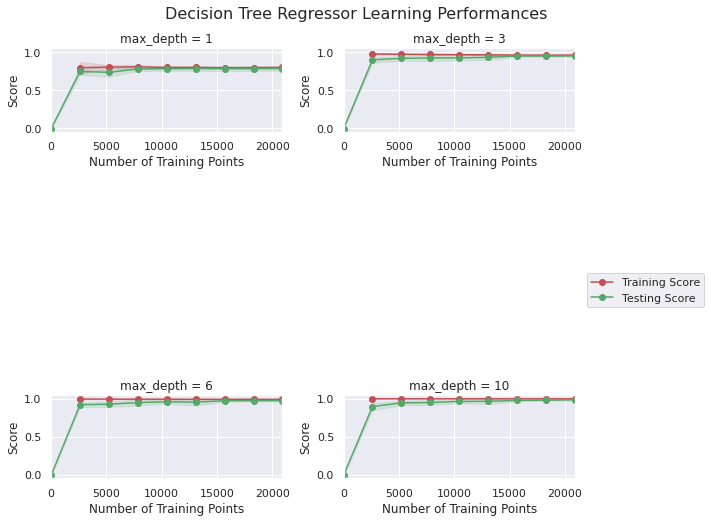

In [27]:
vs.ModelLearning(constant_imputation_features_final, cases)

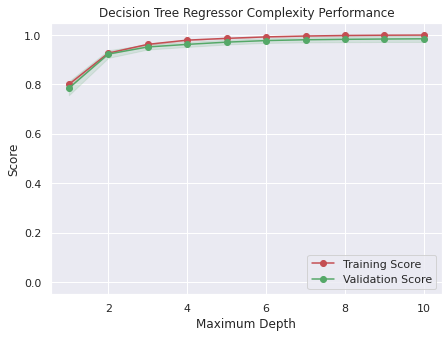

In [28]:
vs.ModelComplexity(constant_imputation_features_final, cases)

## Technique No 2
### Filling with mean value
In this technique we will be filing the missing entries by `mean values`. First of all we will fill up the non-numerical data with constant variable like we did in the previous technique. For numerical data we will be filling it by the `mean value` of feature. For using this technique we will be usng pandas functions. `fillna()` function is used to fill up the missing entries, and the other function `mean()` is used to calculate the mean for each feature. In `fillna()` we had given a second argument which is `inplace=True` this tells the function to filup and save the data in the same variable so we don't need the return values.

In [29]:
# Filling with mean values
mean_imputation_features = selected_features

mean_imputation_features["iso_code"].fillna("Null", inplace=True)
mean_imputation_features["continent"].fillna("Null", inplace=True)

mean_imputation_features.fillna(mean_imputation_features.mean(), inplace=True)

cases.fillna(cases.mean())

missing_percentage = mean_imputation_features.isnull().sum()*100/len(mean_imputation_features)

print("Missing values in percentage: \n\n")
print(missing_percentage)

Missing values in percentage: 


iso_code                      0.0
continent                     0.0
location                      0.0
date                          0.0
total_cases                   0.0
total_deaths                  0.0
new_deaths                    0.0
total_cases_per_million       0.0
new_cases_per_million         0.0
total_deaths_per_million      0.0
new_deaths_per_million        0.0
stringency_index              0.0
population                    0.0
population_density            0.0
median_age                    0.0
aged_65_older                 0.0
aged_70_older                 0.0
gdp_per_capita                0.0
cvd_death_rate                0.0
diabetes_prevalence           0.0
female_smokers                0.0
male_smokers                  0.0
hospital_beds_per_thousand    0.0
life_expectancy               0.0
dtype: float64


## Performing One-Hot Encoding

In [30]:
mean_imputation_features_final = pd.get_dummies(data=mean_imputation_features)
display(mean_imputation_features_final.head(n=3))

,total_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,stringency_index,population,population_density,...,date_2020-06-16,date_2020-06-17,date_2020-06-18,date_2020-06-19,date_2020-06-20,date_2020-06-21,date_2020-06-22,date_2020-06-23,date_2020-06-24,date_2020-06-25
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38928341.0,54.422,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38928341.0,54.422,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38928341.0,54.422,...,0,0,0,0,0,0,0,0,0,0


### Validating model performance
Validating model performance after imputation of missing entries by mean values

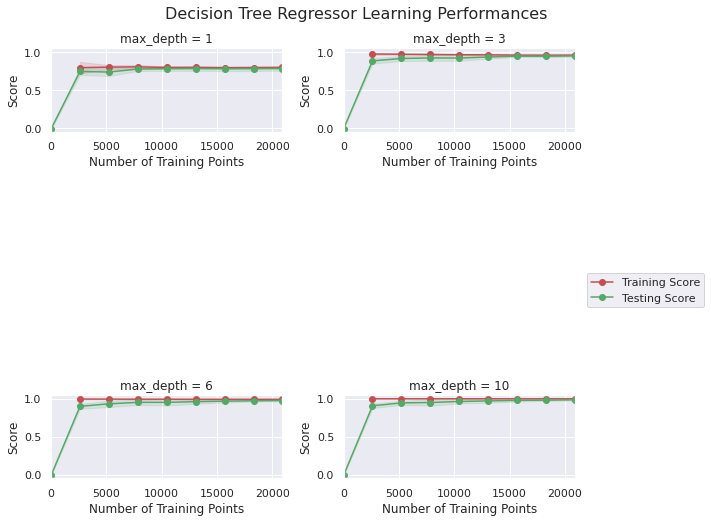

In [31]:
vs.ModelLearning(mean_imputation_features_final, cases)

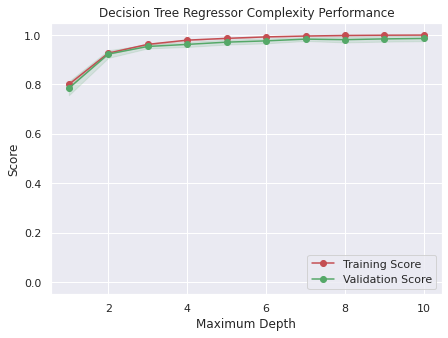

In [32]:
vs.ModelComplexity(mean_imputation_features_final, cases)

## Technique No 3
### Filling with Simple Imputer
In this technique we will be filing the missing entries by a function `SimpleImputer`. This function is provided by `sklearn` library. In this function their are 3 strategies which can be used, we are using `most_frequent` strategy for filling up the dataset missing entries. This function returns a numpy array, so we will be assiging those values by this `simple_imputer_features[:]` notation.

In [33]:
from sklearn.impute import SimpleImputer

simple_imputer_features = selected_features
imputer = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
simple_imputer_features[:] = imputer.fit_transform(simple_imputer_features)

cases.fillna(cases.mean())

missing_percentage = simple_imputer_features.isnull().sum()*100/len(simple_imputer_features)

print("Missing values in percentage: \n\n")
print(missing_percentage)

Missing values in percentage: 


iso_code                      0.0
continent                     0.0
location                      0.0
date                          0.0
total_cases                   0.0
total_deaths                  0.0
new_deaths                    0.0
total_cases_per_million       0.0
new_cases_per_million         0.0
total_deaths_per_million      0.0
new_deaths_per_million        0.0
stringency_index              0.0
population                    0.0
population_density            0.0
median_age                    0.0
aged_65_older                 0.0
aged_70_older                 0.0
gdp_per_capita                0.0
cvd_death_rate                0.0
diabetes_prevalence           0.0
female_smokers                0.0
male_smokers                  0.0
hospital_beds_per_thousand    0.0
life_expectancy               0.0
dtype: float64


## Performing One-Hot Encoding

In [34]:
simple_imputation_features_final = pd.get_dummies(data=simple_imputer_features)
display(simple_imputation_features_final.head(n=3))

,total_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,stringency_index,population,population_density,...,date_2020-06-16,date_2020-06-17,date_2020-06-18,date_2020-06-19,date_2020-06-20,date_2020-06-21,date_2020-06-22,date_2020-06-23,date_2020-06-24,date_2020-06-25
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38928341.0,54.422,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38928341.0,54.422,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38928341.0,54.422,...,0,0,0,0,0,0,0,0,0,0


### Validating model performance
Validating model performance after imputation of missing entries by SimpleImputation function.

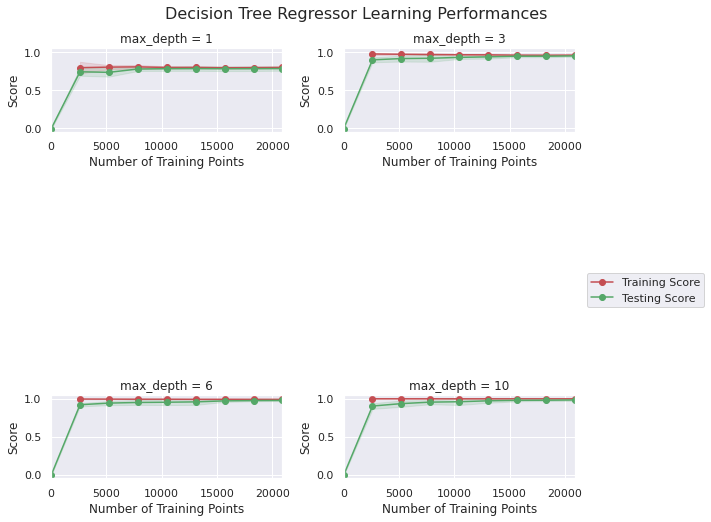

In [35]:
vs.ModelLearning(simple_imputation_features_final, cases)

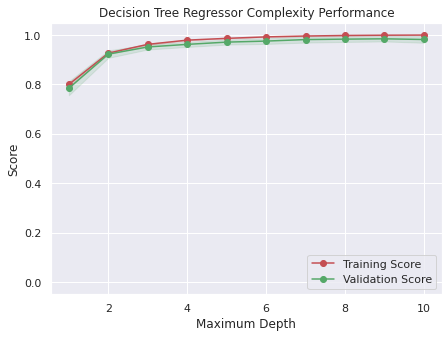

In [36]:
vs.ModelComplexity(simple_imputation_features_final, cases)

## Technique No 4
### Filling with Iterative Imputer
In this technique we will be filing the missing entries by a function `IterativeImputer`. This is a bivariate imputation function. This function is provided by `sklearn` library. In this function we have two parameters `max_iter` and `random_state`. We can assign any value to `max_iter`, and in `random_state` if the value is 0 then the entries will be not randomly assigned and if it is 1 it will be randomised. This function does not work with non-numerical features so we will drop the columns which have non-numerical data

In [37]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

multi_imputer_features = selected_features.drop(["iso_code","continent","date","location"], axis=1)
imputer = IterativeImputer(max_iter=5, random_state=1)
multi_imputer_features[:] = imputer.fit_transform(multi_imputer_features)

cases.fillna(cases.mean())

# print(cases)

missing_percentage = multi_imputer_features.isnull().sum()*100/len(multi_imputer_features)

print("Missing values in percentage: \n\n")
print(missing_percentage)


Missing values in percentage: 


total_cases                   0.0
total_deaths                  0.0
new_deaths                    0.0
total_cases_per_million       0.0
new_cases_per_million         0.0
total_deaths_per_million      0.0
new_deaths_per_million        0.0
stringency_index              0.0
population                    0.0
population_density            0.0
median_age                    0.0
aged_65_older                 0.0
aged_70_older                 0.0
gdp_per_capita                0.0
cvd_death_rate                0.0
diabetes_prevalence           0.0
female_smokers                0.0
male_smokers                  0.0
hospital_beds_per_thousand    0.0
life_expectancy               0.0
dtype: float64


### Validating model performance
Validating model performance after imputation of missing entries by IterativeImputer function.

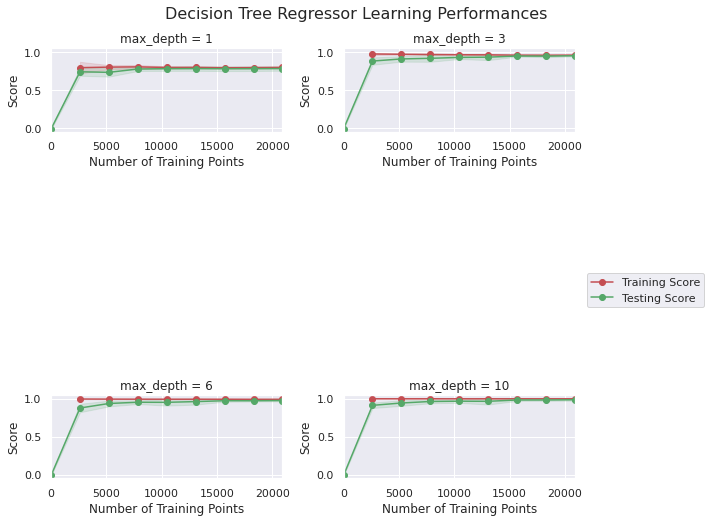

In [38]:
vs.ModelLearning(multi_imputer_features, cases)

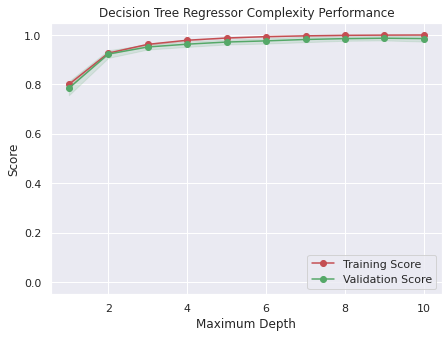

In [39]:
vs.ModelComplexity(multi_imputer_features, cases)

--------------------------------------------------------------------------------
## Correlation Analysis
Correlation analysis is use to find the associations between variables.The correlation coefficient is measured on a scale that varies from + 1 through 0 to - 1. Complete correlation between two variables is expressed by either + 1 or -1. When one variable increases as the other increases the correlation is positive; when one decreases as the other increases it is negative. Complete absence of correlation is represented by 0.

We are using pandas to calulate the correlation of a dataset, pandas function `.corr()` is used to calculate the correlation between features. There are 3 methods which can be used to calculate the correlation between features. we are using a standard one `Pearson method`, other two methods are `kendall` and `spearman`.

In [40]:
corr_analysis = multi_imputer_features.corr(method="pearson")
corr_analysis

,total_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy
total_cases,1.000000,0.987253,0.767385,0.063884,0.034267,0.084861,0.036774,-0.038786,0.589788,-0.014971,0.041897,0.038150,0.035171,0.027454,-0.010215,0.024591,0.030347,0.044083,0.014383,0.016631
total_deaths,0.987253,1.000000,0.790789,0.065219,0.024504,0.133389,0.048376,-0.038403,0.597225,-0.016003,0.050769,0.055700,0.054292,0.031836,-0.024144,0.013980,0.043273,0.041346,0.013473,0.024471
new_deaths,0.767385,0.790789,1.000000,0.036071,0.042230,0.072691,0.103561,-0.031415,0.653743,-0.017778,0.048019,0.048313,0.045729,0.026611,-0.021359,0.020373,0.037595,0.041636,0.009285,0.021397
total_cases_per_million,0.063884,0.065219,0.036071,1.000000,0.421468,0.630470,0.181097,-0.008962,-0.034280,0.061096,-0.133060,-0.038658,-0.034375,0.258341,-0.268608,-0.048947,0.069893,-0.074097,-0.004952,0.126716
new_cases_per_million,0.034267,0.024504,0.042230,0.421468,1.000000,0.163592,0.189065,0.057364,-0.018633,0.027589,-0.035172,-0.033747,-0.033452,0.179896,-0.115478,0.032072,0.022911,-0.017052,-0.007426,0.069542
total_deaths_per_million,0.084861,0.133389,0.072691,0.630470,0.163592,1.000000,0.282245,0.039422,-0.017388,0.017839,-0.051816,0.094309,0.106839,0.194919,-0.243374,-0.105595,0.168901,-0.055064,0.043228,0.111757
new_deaths_per_million,0.036774,0.048376,0.103561,0.181097,0.189065,0.282245,1.000000,0.065488,-0.007665,0.004604,-0.008825,0.057543,0.062922,0.094783,-0.119575,-0.049202,0.093392,-0.024002,0.019420,0.054749
stringency_index,-0.038786,-0.038403,-0.031415,-0.008962,0.057364,0.039422,0.065488,1.000000,-0.090147,-0.105297,0.082818,-0.022417,-0.041039,-0.034509,0.246963,0.068042,-0.000152,0.118911,-0.042432,-0.069293
population,0.589788,0.597225,0.653743,-0.034280,-0.018633,-0.017388,-0.007665,-0.090147,1.000000,-0.020323,0.031996,0.005349,-0.002821,-0.029622,0.023601,0.035884,-0.027699,0.083493,0.001819,-0.007119
population_density,-0.014971,-0.016003,-0.017778,0.061096,0.027589,0.017839,0.004604,-0.105297,-0.020323,1.000000,-0.141175,-0.079019,-0.086043,0.054021,-0.193884,0.014955,-0.079334,-0.085090,0.292260,0.145853


### Plotting heatmap
The cell below will generate the heatmap for the corrleation analysis, this will helps us in visualizing the results. For plotting the heatmap we will be using `Seaborn` library function `.heatmap()`, this function takes the information about the correlation analysis and heat map colour is given in `cmap` parameter.

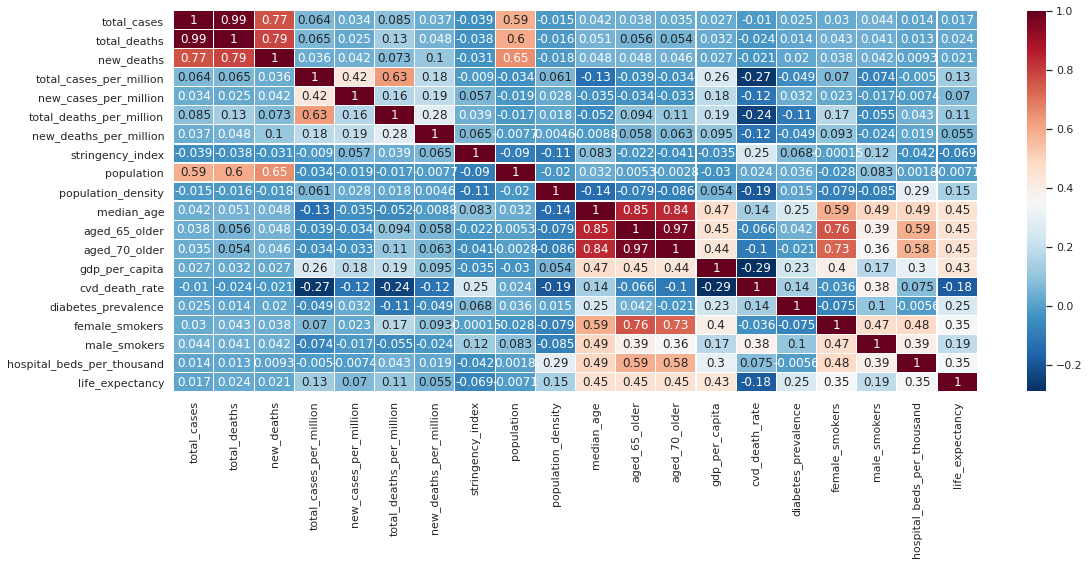

In [41]:
sb.set(rc={"figure.figsize":(18, 7)})
sb.heatmap(corr_analysis, 
            xticklabels=corr_analysis.columns,
            yticklabels=corr_analysis.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.1)

## Validation of features
Now we will be validating our features, which have been selected after correlation analysis. we will be using model cmplexity graph and learning curves same as before.

In [42]:
testing_features = multi_imputer_features.get(["total_cases", "total_deaths", "new_deaths", "population", "median_age"])

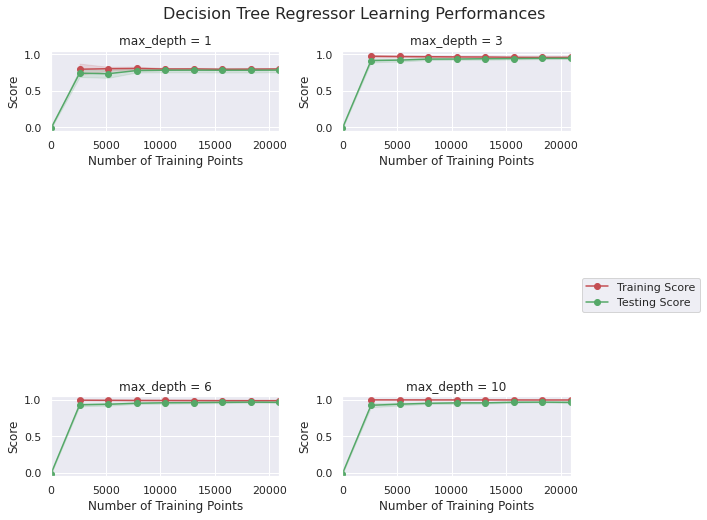

In [43]:
vs.ModelLearning(testing_features, cases)

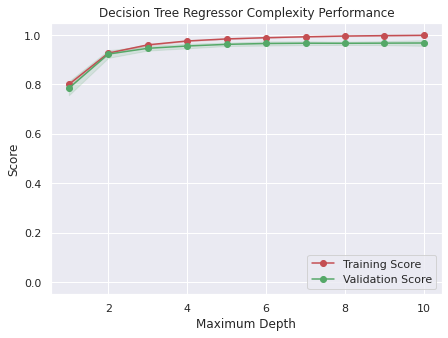

In [44]:
vs.ModelComplexity(testing_features, cases)